### AMC/AIME

In [1]:
import json
with open('../Data/AMC/aime.json', 'r') as file:
    data = json.load(file)

In [2]:
with open('../Data/AMC/amc12.json', 'r') as file:
    data2 = json.load(file)

In [49]:
import re
def clean_author(text):
    # Trim trailing newline characters
    text = text.rstrip('\n')
    
    # Split the text into lines
    lines = text.split('\n')
    
    # Check if the last line starts with '~' and remove it if it does
    # this remove author at the end
    if lines and lines[-1].startswith('~'):
        lines = lines[:-1]
    
    # Join the lines back into a text string
    cleaned_text = '\n'.join(lines)

    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.(com|org|net|edu)\b'
    
    # Replace all occurrences of the email pattern with an empty string
    cleaned_text = re.sub(email_pattern, '', cleaned_text)
    return cleaned_text

In [50]:
outputs = []

for input_dict in (data+data2):
    # context = input_dict.get('context', '')
    # context is about world knowledge for physics. dont need to know to solve maths.
    question = input_dict.get('problem', '')
    solution_list = input_dict.get('solutions', [])  # Default to an empty list if not found
    # solution = ' '.join(solution_list)
    for solution in solution_list:

        # Concatenate the fields
        # concatenated_string = f"{context} {question} Solution: {solution}"
        concatenated_string = f"{question} Solution: {clean_author(solution['solution'])}"
    
        # Append the result to the outputs list
        outputs.append(concatenated_string)

In [59]:
len(outputs)

5733

In [3]:
len(data),len(data2)

(975, 1124)

In [4]:
975+1124

2099

In [60]:
output_file_path = '../Data/AMC/outputs.json'
with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(outputs, f, ensure_ascii=False, indent=None)

In [61]:
with open(output_file_path, 'r', encoding='utf-8') as f:
    # Load the list from the JSON file
    loaded_outputs = json.load(f)

In [62]:
all([i==j for i,j in zip(outputs,loaded_outputs)])

True

### OlympiadBench
  * OE: Open-ended questions
  * TP: Theorem proof problems
  * MM: Multimodal
  * TO: Text-only
  * physics: Physics problems
  * maths: Math problems
  * en: English
  * zh: Chinese
  * COMP: Competition problems
  * CEE: Chinese College Entrance Exam problems
  
  deepseek is trained on Chinese and English. So we can FT on both language.

  physics data is included
  
  context is not included. context is about world knowledge for physics. dont need to know to solve maths.

In [5]:
import os
import json

directory_path = '../Data/OlympiadBench_Dataset/data'
# files_with_en = [file for file in os.listdir(directory_path) if "en" in file and 'TO' in file]
# files_with_en = [file for file in os.listdir(directory_path) if "en" in file]
files_with_en = [file for file in os.listdir(directory_path) if "output" not in file]
# Process each file
outputs = []
for file_name in files_with_en:
    # Construct the full path to the file
    file_path = os.path.join(directory_path, file_name)
    
    with open(file_path, 'r', encoding='utf-8') as file:
        inputs = json.load(file)
    
    # For each input, extract the desired fields, concatenate them, and add to the outputs list
    for input_dict in inputs:
        # context = input_dict.get('context', '')
        # context is about world knowledge for physics. dont need to know to solve maths.
        question = input_dict.get('question', '')
        solution_list = input_dict.get('solution', [])  # Default to an empty list if not found
        # solution = ' '.join(solution_list)
        for solution in solution_list:

            # Concatenate the fields
            # concatenated_string = f"{context} {question} Solution: {solution}"
            concatenated_string = f"{question} Solution: {solution}"
        
            # Append the result to the outputs list
            outputs.append(concatenated_string)

In [4]:
output_file_path = os.path.join(directory_path, 'outputs.json')

with open(output_file_path, 'w', encoding='utf-8') as f:
    json.dump(outputs, f, ensure_ascii=False, indent=None)

In [6]:
import json
import os 
directory_path = '../Data/OlympiadBench_Dataset/data'
output_file_path = os.path.join(directory_path, 'outputs.json')
# Open the file for reading
with open(output_file_path, 'r', encoding='utf-8') as f:
    # Load the list from the JSON file
    loaded_outputs = json.load(f)

In [7]:
all([i==j for i,j in zip(outputs,loaded_outputs)])

True

In [5]:
lens = [len(txt) for txt in outputs]

In [6]:
import matplotlib.pyplot as plt

(array([7.556e+03, 1.107e+03, 3.360e+02, 1.000e+02, 3.500e+01, 2.000e+01,
        4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([   61. ,  1503.6,  2946.2,  4388.8,  5831.4,  7274. ,  8716.6,
        10159.2, 11601.8, 13044.4, 14487. ]),
 <BarContainer object of 10 artists>)

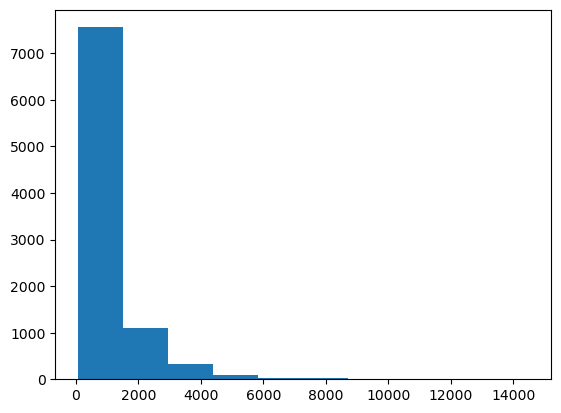

In [7]:
plt.hist(lens)

### MATH

In [11]:
import os
import glob
import json

In [8]:
files = glob.glob(os.path.join('../Data/MATH', '**', '*.json'), recursive=True)

In [26]:
outputs = []
for file_ in files:
    with open(file_, 'r') as file:
        data = json.load(file)
    concatenated_string = f"{data['problem']} Solution: {data['solution']}"
    outputs.append(concatenated_string)

In [30]:
with open('../Data/MATH/outputs.json', 'w', encoding='utf-8') as f:
    json.dump(outputs, f, ensure_ascii=False, indent=None)